# Data Project - Stock Market Analysis 

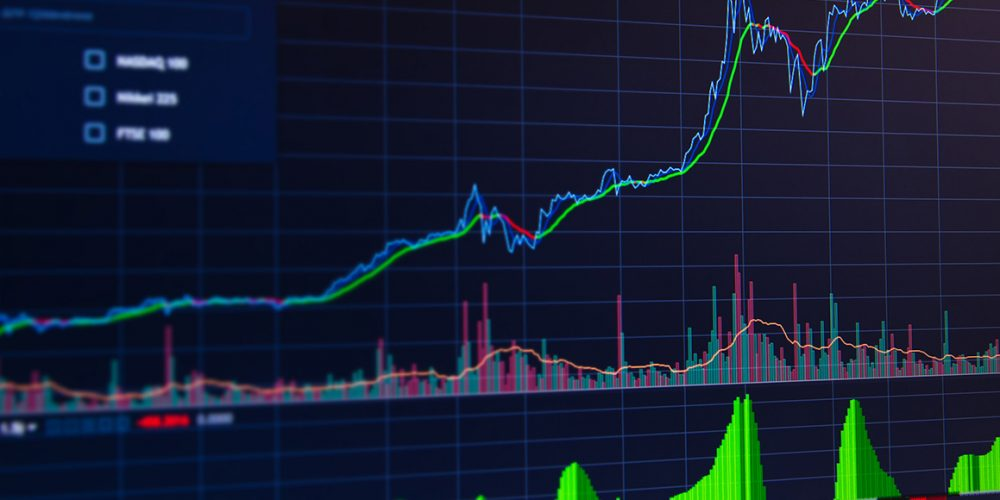

Time Series data is a series of data points indexed in time order. Time series data is everywhere, so manipulating them is important for any data analyst or data scientist.

In this notebook, we will discover and explore data from the stock market, particularly some technology stocks (Apple, Amazon, Google, and Microsoft). We will learn how to use yfinance to get stock information, and visualize different aspects of it using Seaborn and Matplotlib. we will look at a few ways of analyzing the risk of a stock, based on its previous performance history. We will also be predicting future stock prices through a Long Short Term Memory (LSTM) method!

We'll be answering the following questions along the way:

    1.) What was the change in price of the stock over time?
    2.) What was the daily return of the stock on average?
    3.) What was the moving average of the various stocks?
    4.) What was the correlation between different stocks'?
    5.) How much value do we put at risk by investing in a particular stock?
    6.) How can we attempt to predict future stock behavior? (Predicting the closing price stock price of APPLE inc using LSTM)

***   

## Getting the Data
The first step is to get the data and load it to memory. We will get our stock data from the Yahoo Finance website. Yahoo Finance is a rich resource of financial market data and tools to find compelling investments. To get the data from Yahoo Finance, we will be using yfinance library which offers a threaded and Pythonic way to download market data from Yahoo. Check this article to learn more about yfinance: [Reliably download historical market data from with Python](https://aroussi.com/post/python-yahoo-finance)

# 1. What was the change in price of the stock overtime?

In this section we'll go over how to handle requesting stock information with pandas, and how to analyze basic attributes of a stock.

In [26]:
!pip install pandas_datareader
!pip install -q yfinance

In [27]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

yf.pdr_override()

# For time stamps
from datetime import datetime


# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Set up End and Start times for data grab
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)
    

company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.tail(10)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2024-11-11,208.500000,209.649994,205.589996,206.839996,206.839996,35456000,AMAZON
2024-11-12,208.369995,209.539993,206.009995,208.910004,208.910004,38942900,AMAZON
2024-11-13,209.399994,215.089996,209.139999,214.100006,214.100006,46212900,AMAZON
2024-11-14,214.160004,215.899994,210.880005,211.479996,211.479996,42620300,AMAZON
2024-11-15,206.759995,207.339996,199.610001,202.610001,202.610001,86591100,AMAZON
2024-11-18,204.149994,204.669998,200.949997,201.699997,201.699997,36512500,AMAZON
2024-11-19,199.330002,205.300003,198.779999,204.610001,204.610001,31197900,AMAZON
2024-11-20,202.979996,203.130005,199.449997,202.880005,202.880005,32769000,AMAZON
2024-11-21,203.490005,203.490005,195.750000,198.380005,198.380005,58800000,AMAZON


Reviewing the content of our data, we can see that the data is numeric and the date is the index of the data. Notice also that weekends are missing from the records.

**Quick note:** Using `globals()` is a sloppy way of setting the `DataFrame` names, but it's simple. Now we have our data, let's perform some basic data analysis and check our data.

## Descriptive Statistics about the Data
`.describe()` generates descriptive statistics. Descriptive statistics include those that summarize the central tendency, dispersion, and shape of a dataset’s distribution, excluding `NaN` values.

Analyzes both numeric and object series, as well as `DataFrame` column sets of mixed data types. The output will vary depending on what is provided. Refer to the notes below for more detail.

In [28]:
# Summary Stats
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,201.739960,203.560675,200.007262,201.887182,201.357794,5.745086e+07
std,21.823295,22.057874,21.509958,21.874028,22.051728,3.039286e+07
min,165.350006,166.399994,164.080002,165.000000,164.405121,2.404830e+07
25%,183.827499,185.134995,182.204998,184.224998,183.452492,4.213035e+07
50%,195.199997,196.565002,193.750000,194.770004,193.976807,5.013555e+07
75%,224.512501,226.165005,222.699993,224.249996,224.229996,6.372982e+07
max,236.479996,237.490005,234.449997,236.479996,236.220108,3.186799e+08


We have only 255 records in one year because weekends are not included in the data.

## Information About the Data
`.info()` method prints information about a DataFrame including the index `dtype` and columns, non-null values, and memory usage.

In [29]:
# General info
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2023-11-24 to 2024-11-22
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          252 non-null    float64
 1   High          252 non-null    float64
 2   Low           252 non-null    float64
 3   Close         252 non-null    float64
 4   Adj Close     252 non-null    float64
 5   Volume        252 non-null    int64  
 6   company_name  252 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.8+ KB


## Closing Price

The closing price is the last price at which the stock is traded during the regular trading day. A stock’s closing price is the standard benchmark used by investors to track its performance over time.

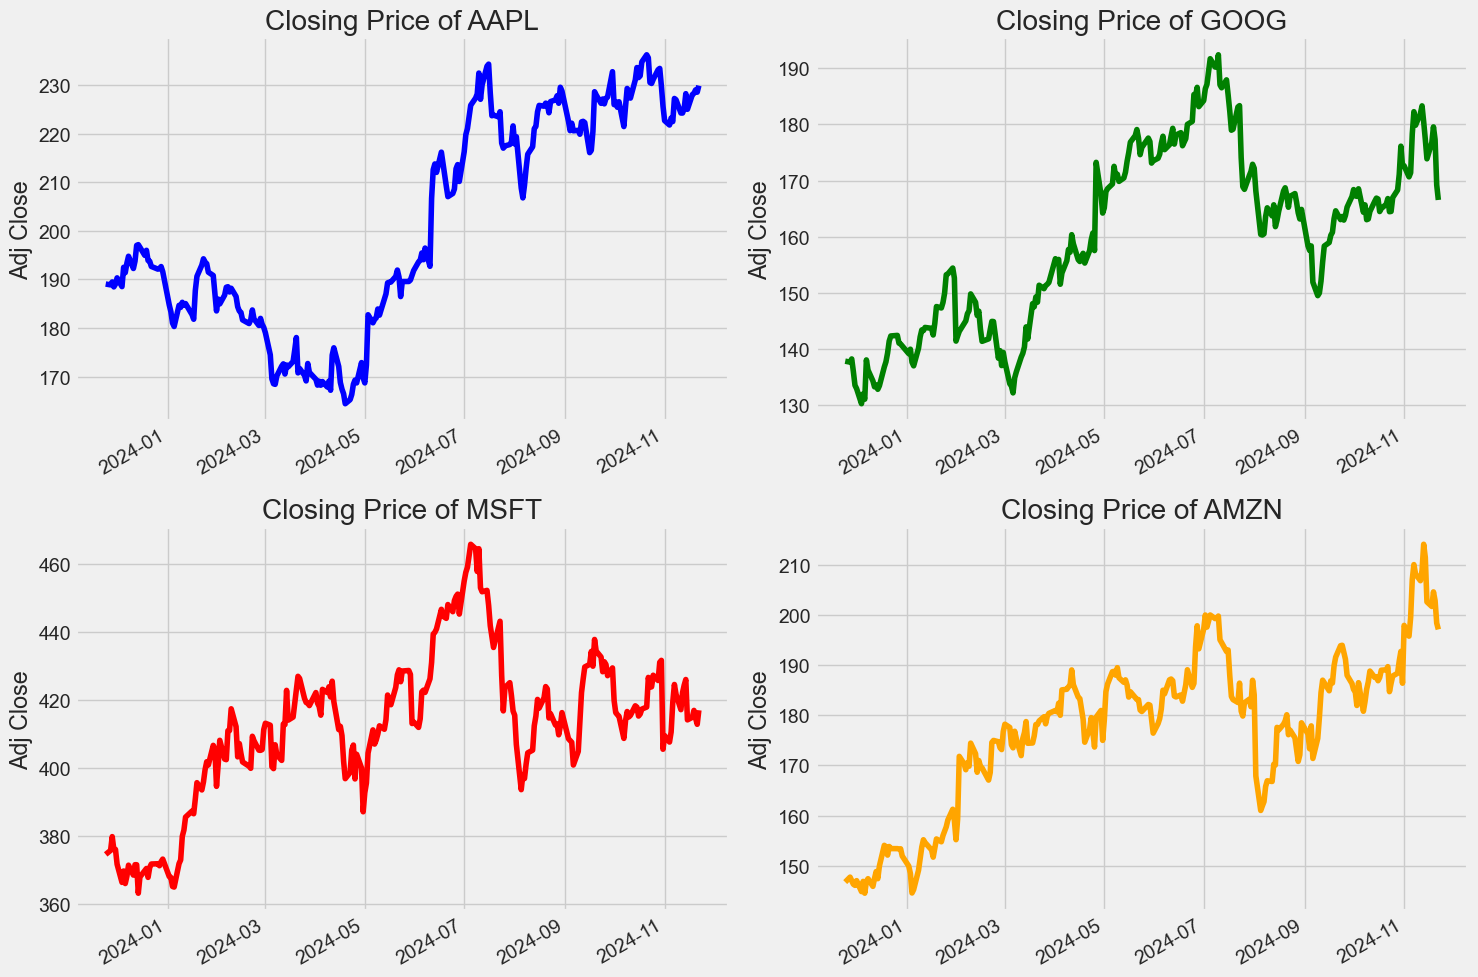

In [30]:
import matplotlib.pyplot as plt

# Liste de couleurs à utiliser pour chaque graphique
colors = ['blue', 'green', 'red', 'orange']  # Ajoutez d'autres couleurs si nécessaire

plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

# Parcourir les entreprises et attribuer une couleur différente à chaque graphique
for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot(color=colors[i - 1])  # Spécifier la couleur
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")

plt.tight_layout()
plt.show()


## Volume of Sales
Volume is the amount of an asset or security that changes hands over some period of time, often over the course of a day. For instance, the stock trading volume would refer to the number of shares of security traded between its daily open and close. Trading volume, and changes to volume over the course of time, are important inputs for technical traders.

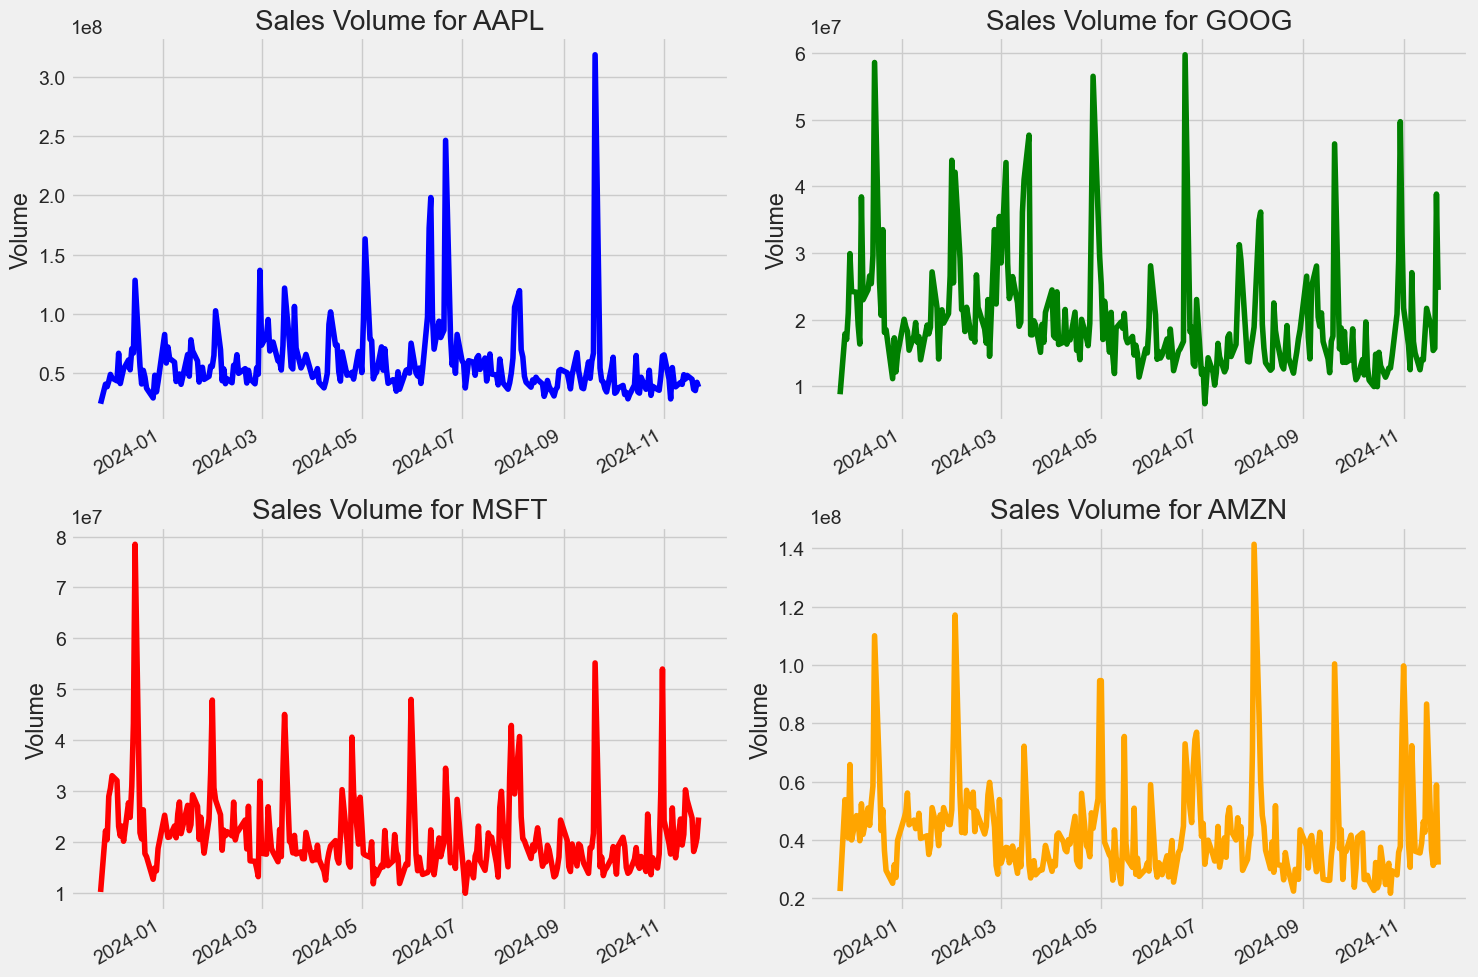

In [31]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)
colors = ['blue', 'green', 'red', 'orange']

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot(color=colors[i - 1])
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")
    
plt.tight_layout()
plt.show()


Now that we've seen the visualizations for the closing price and the volume traded each day, let's go ahead and caculate the moving average for the stock.

# 2. What was the moving average of the various stocks?

The moving average (MA) is a simple technical analysis tool that smooths out price data by creating a constantly updated average price. The average is taken over a specific period of time, like 10 days, 20 minutes, 30 weeks, or any time period the trader chooses.

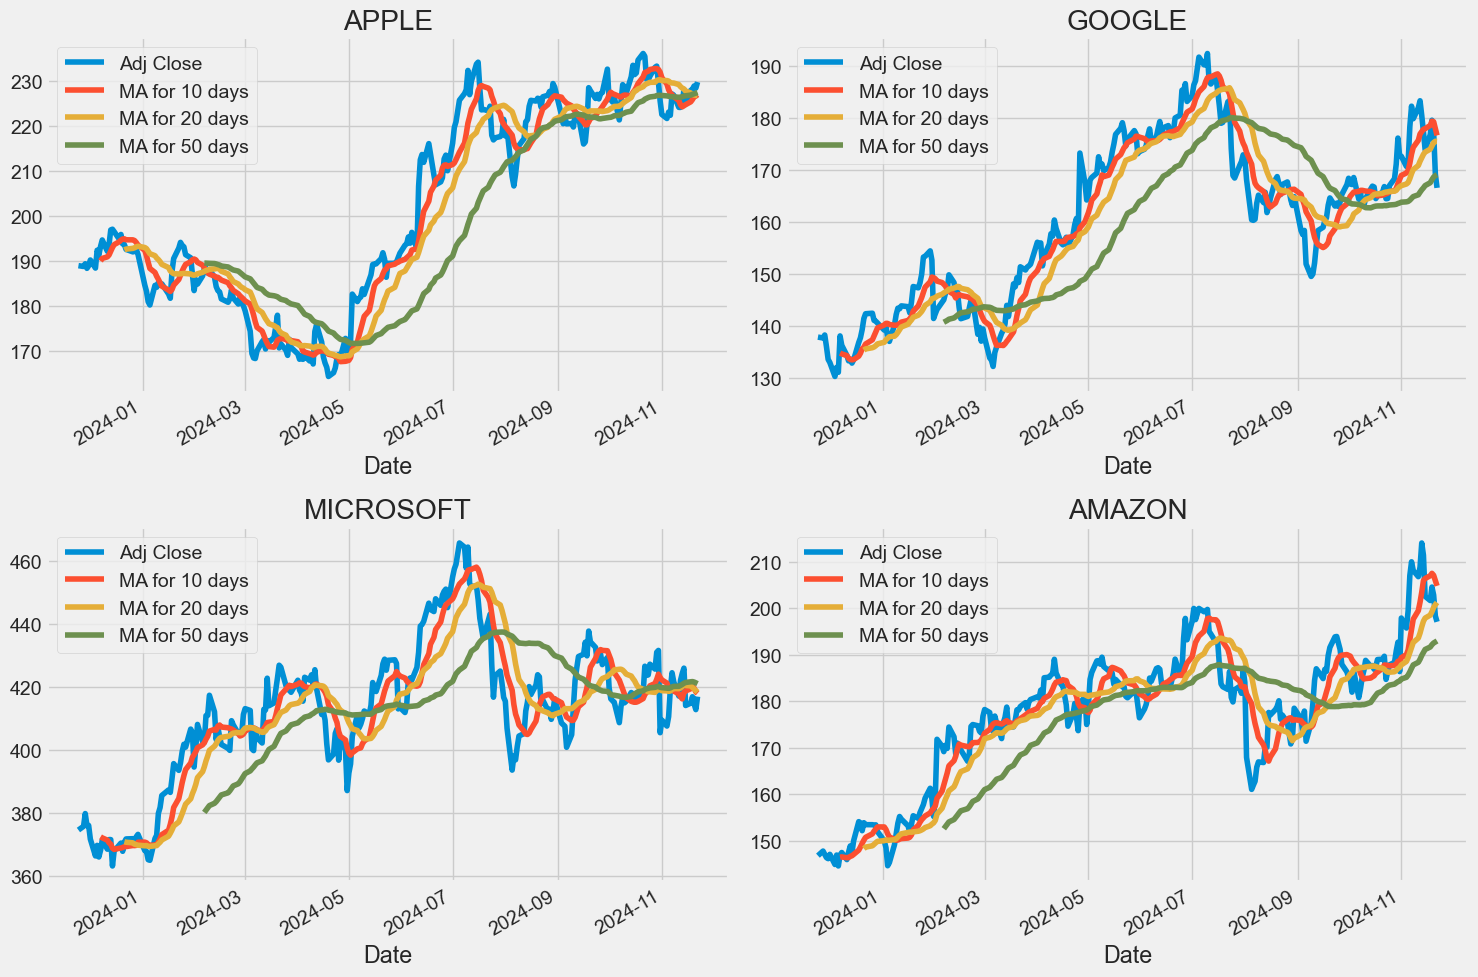

In [32]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()
        

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()

We see in the graph that the best values to measure the moving average are 10 and 20 days because we still capture trends in the data without noise.

# 3. What was the daily return of the stock on average?

Now that we've done some baseline analysis, let's go ahead and dive a little deeper. We're now going to analyze the risk of the stock. In order to do so we'll need to take a closer look at the daily changes of the stock, and not just its absolute value. Let's go ahead and use pandas to retrieve teh daily returns for the Apple stock.

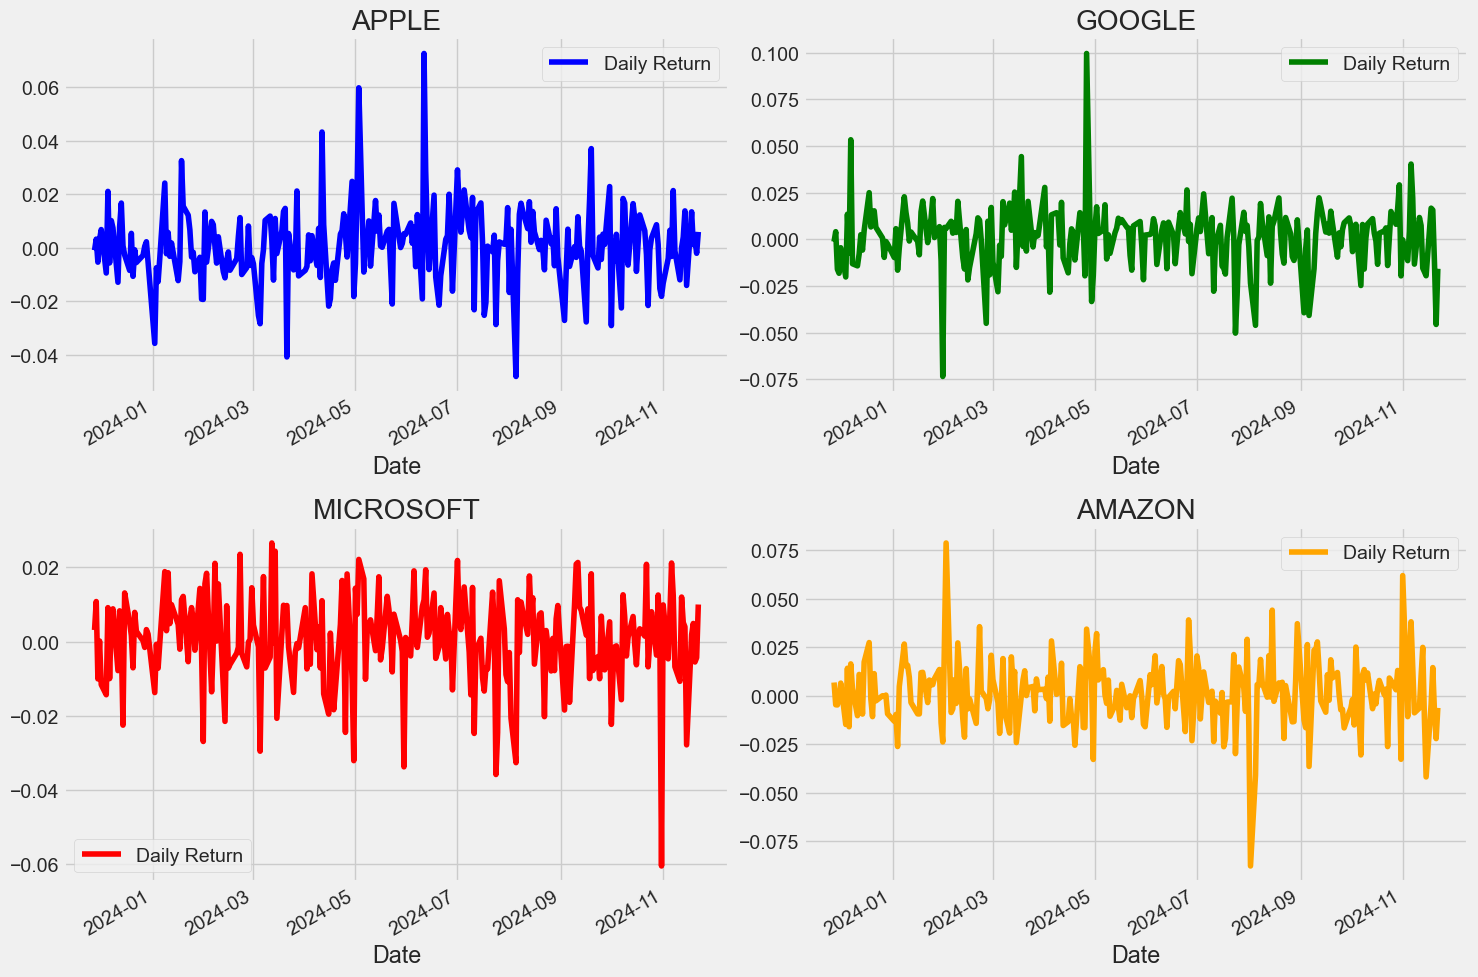

In [33]:
# Ajout des couleurs pour chaque graphique
colors = ['blue', 'green', 'red', 'orange']  # Une couleur pour chaque entreprise
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()
GOOG['Daily Return'] = GOOG['Adj Close'].pct_change()
MSFT['Daily Return'] = MSFT['Adj Close'].pct_change()
AMZN['Daily Return'] = AMZN['Adj Close'].pct_change()

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

# Tracer avec des couleurs spécifiques
AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, color=colors[0])
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, color=colors[1])
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, color=colors[2])
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, color=colors[3])
axes[1,1].set_title('AMAZON')

fig.tight_layout()
plt.show()


Great, now let's get an overall look at the average daily return using a histogram. We'll use seaborn to create both a histogram and kde plot on the same figure.

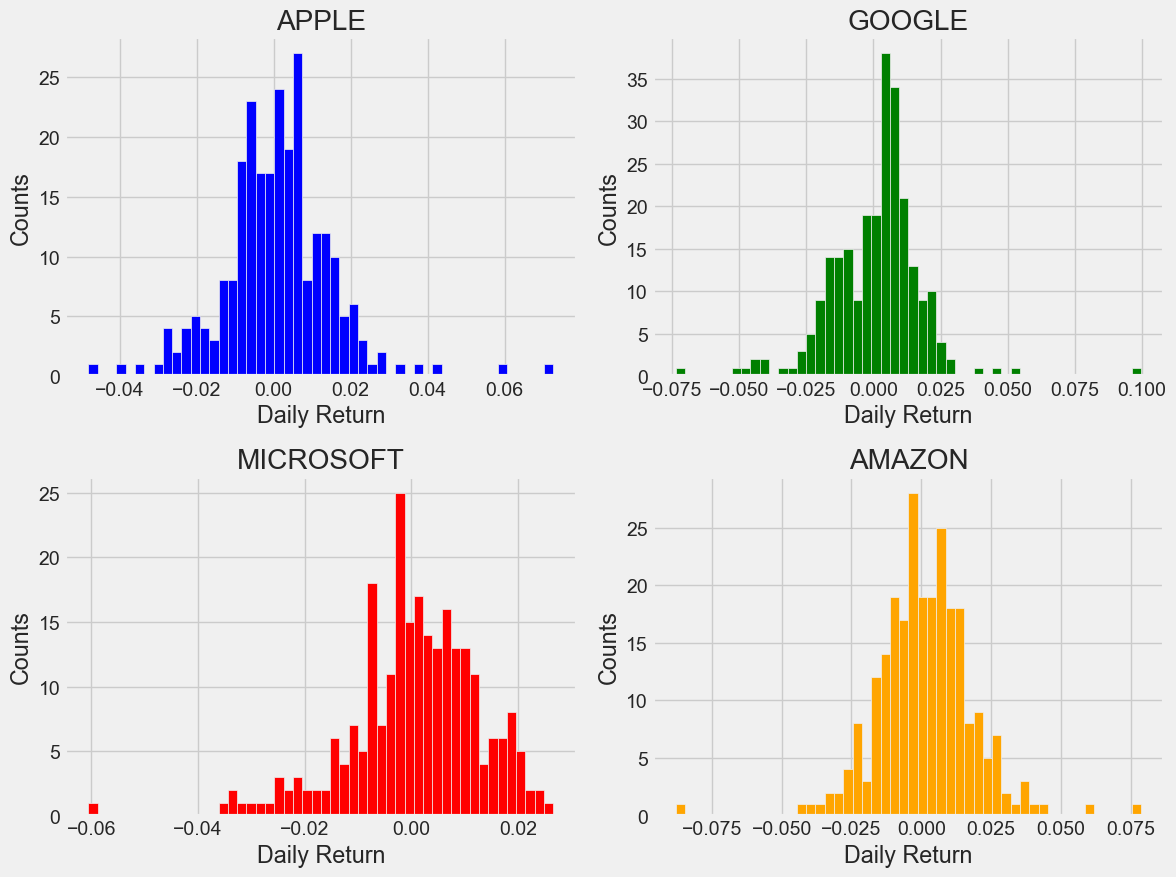

In [34]:
import matplotlib.pyplot as plt

# Liste des couleurs pour les histogrammes
colors = ['blue', 'green', 'red', 'orange']

plt.figure(figsize=(12, 9))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50, color=colors[i - 1])  # Couleur spécifique
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i - 1]}')

plt.tight_layout()
plt.show()


# 4. What was the correlation between different stocks closing prices?

Correlation is a statistic that measures the degree to which two variables move in relation to each other which has a value that must fall between -1.0 and +1.0. Correlation measures association, but doesn’t show if x causes y or vice versa — or if the association is caused by a third factor[1].

Now what if we wanted to analyze the returns of all the stocks in our list? Let's go ahead and build a DataFrame with all the ['Close'] columns for each of the stocks dataframes.

In [35]:
# Grab all the closing prices for the tech stock list into one DataFrame

closing_df = pdr.get_data_yahoo(tech_list, start=start, end=end)['Adj Close']

# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()

[*********************100%%**********************]  4 of 4 completed


Ticker,AAPL,AMZN,GOOG,MSFT
Date,,,,
2023-11-24,NaN,NaN,NaN,NaN
2023-11-27,-0.000948,0.006747,-0.001230,0.003126
2023-11-28,0.003214,-0.004738,0.004129,0.010803
2023-11-29,-0.005410,-0.004829,-0.016015,-0.010060
2023-11-30,0.003063,-0.001572,-0.018182,0.000158


Now we can compare the daily percentage return of two stocks to check how correlated. First let's see a sotck compared to itself.

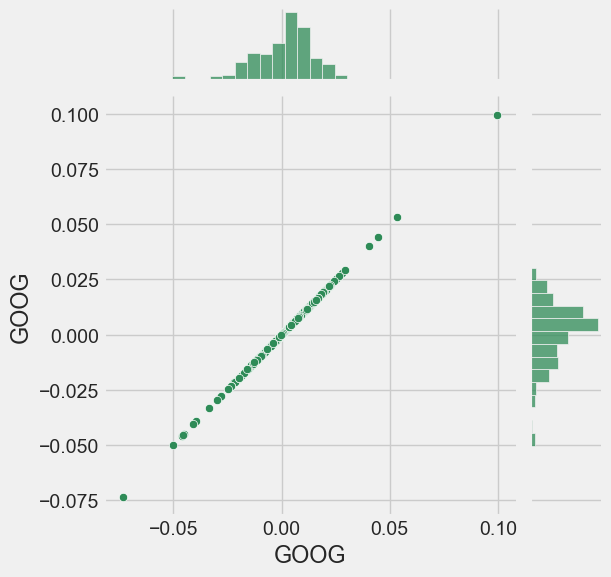

In [36]:
# Comparing Google to itself should show a perfectly linear relationship
sns.jointplot(x='GOOG', y='GOOG', data=tech_rets, kind='scatter', color='seagreen')

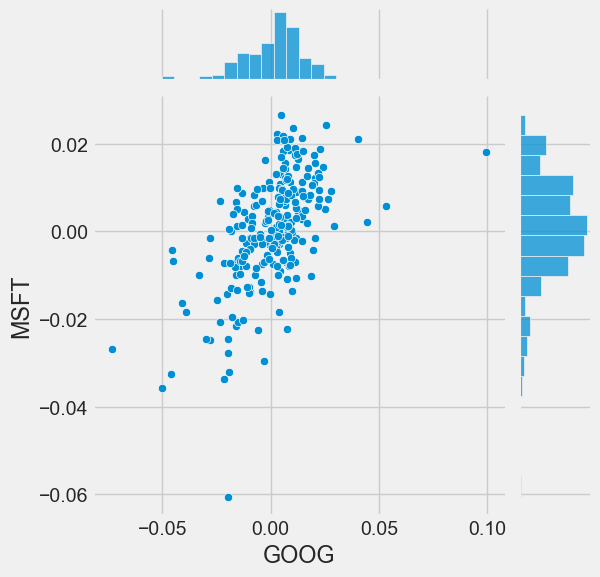

In [37]:
# We'll use joinplot to compare the daily returns of Google and Microsoft
sns.jointplot(x='GOOG', y='MSFT', data=tech_rets, kind='scatter')

So now we can see that if two stocks are perfectly (and positivley) correlated with each other a linear relationship bewteen its daily return values should occur. 

Seaborn and pandas make it very easy to repeat this comparison analysis for every possible combination of stocks in our technology stock ticker list. We can use sns.pairplot() to automatically create this plot

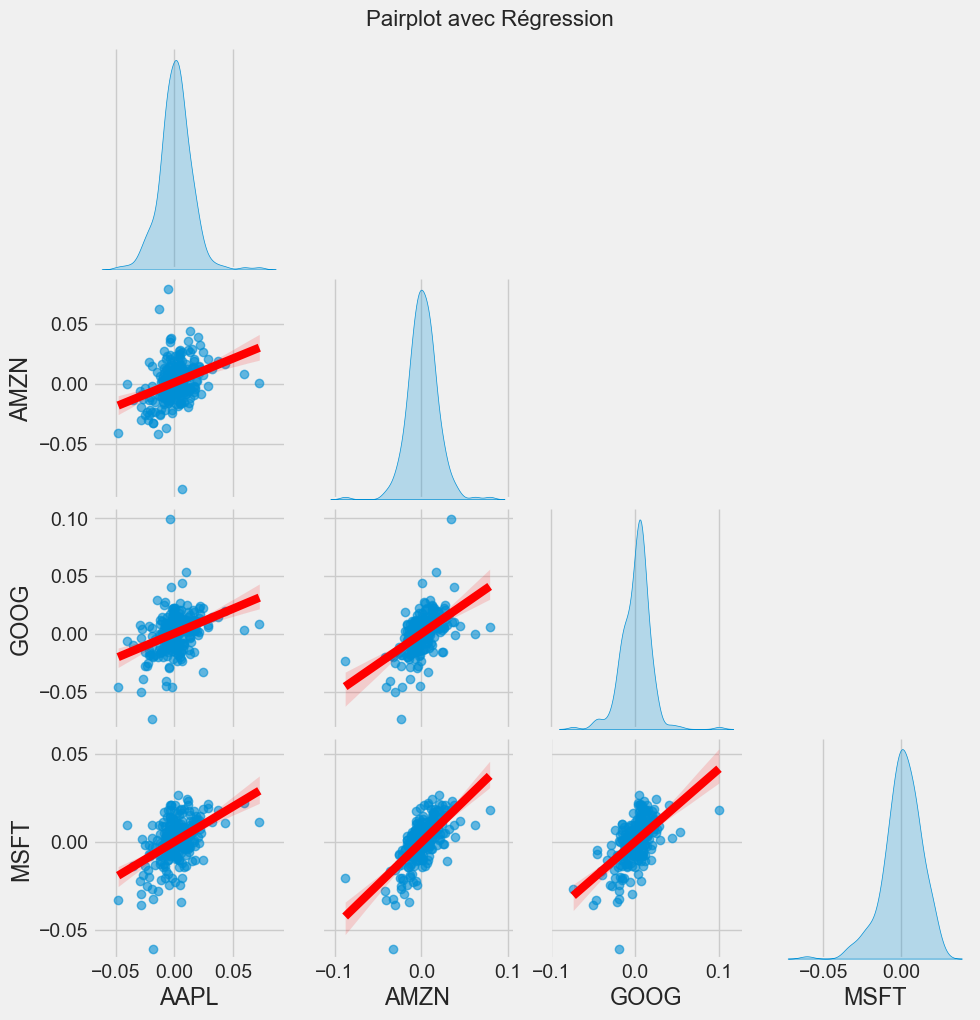

In [38]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis 
# of all the comparisons
#sns.pairplot(tech_rets, kind='reg')

# Appliquer un style Seaborn


# Créer le pairplot
pairplot = sns.pairplot(
    tech_rets,
    diag_kind='kde',  # Afficher des courbes KDE sur la diagonale
    kind='reg',       # Ajouter des régressions pour les scatterplots
    plot_kws={'scatter_kws': {'alpha': 0.6}, 'line_kws': {'color': 'red'}},  # Ajuster la transparence des points
    corner=True       # Montrer uniquement la moitié inférieure
)

# Ajouter un titre global
plt.suptitle('Pairplot avec Régression', y=1.02, fontsize=16)
plt.show()

Finally, we could also do a correlation plot, to get actual numerical values for the correlation between the stocks' daily return values. By comparing the closing prices, we see an interesting relationship between Microsoft and Apple.

Text(0.5, 1.0, 'Correlation of stock closing price')

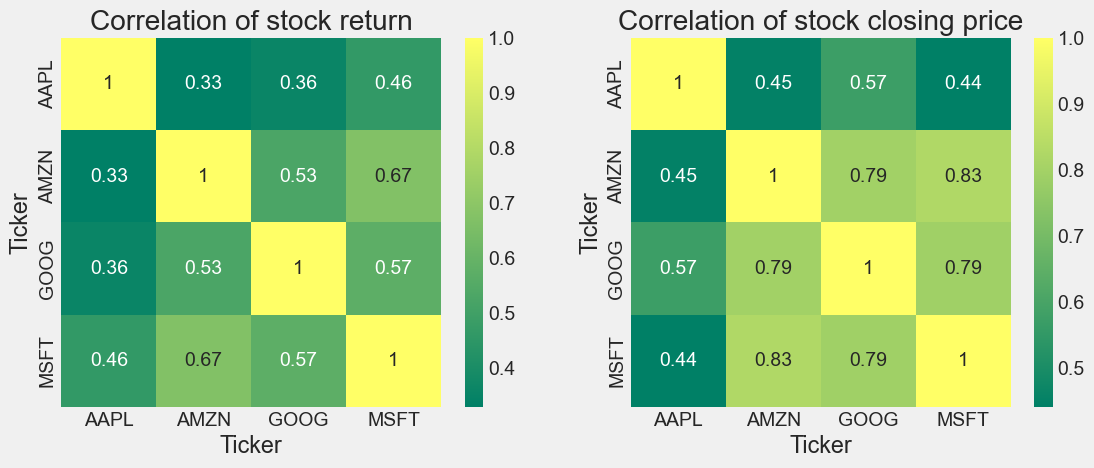

In [39]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')

Just like we suspected in our `PairPlot` we see here numerically and visually that Microsoft and Amazon had the strongest correlation of daily stock return. It's also interesting to see that all the technology comapnies are positively correlated.

# 5. How much value do we put at risk by investing in a particular stock?

There are many ways we can quantify risk, one of the most basic ways using the information we've gathered on daily percentage returns is by comparing the expected return with the standard deviation of the daily returns.

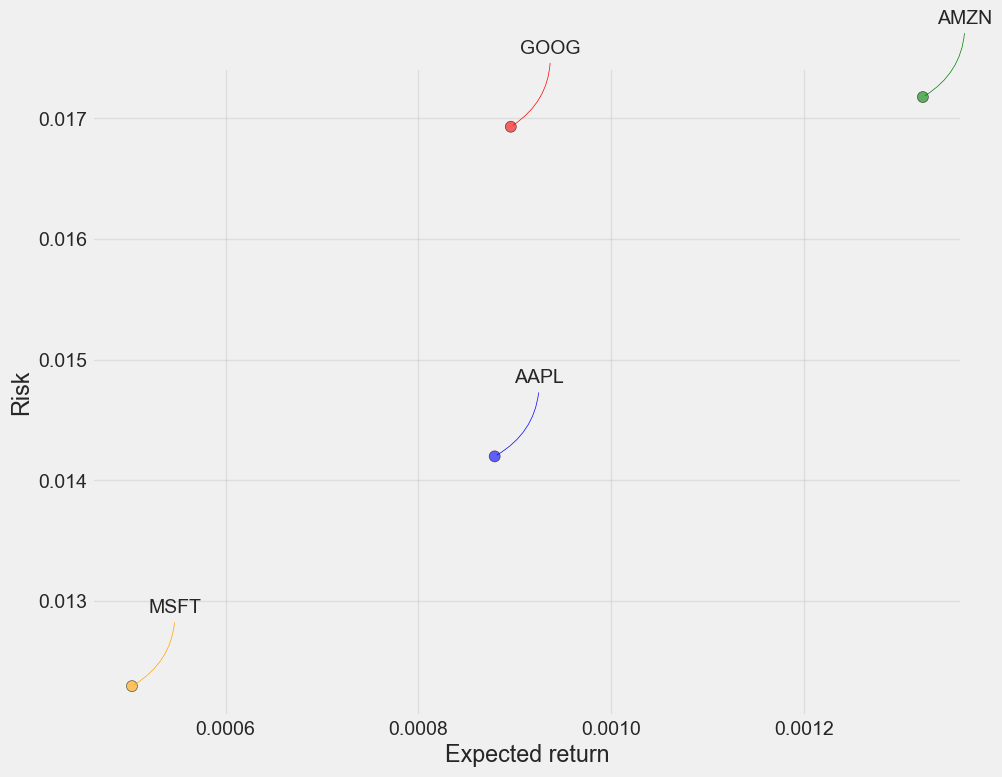

In [40]:
import numpy as np
import matplotlib.pyplot as plt

# Retirer les valeurs manquantes
rets = tech_rets.dropna()

# Taille des points
area = np.pi * 20

# Couleurs pour chaque entreprise
colors = ['blue', 'green', 'red', 'orange']  # Une couleur par colonne

plt.figure(figsize=(10, 8))

# Nuage de points avec différentes couleurs
plt.scatter(rets.mean(), rets.std(), s=area, c=colors, alpha=0.6, edgecolors='black')
plt.xlabel('Expected return')
plt.ylabel('Risk')

# Ajouter des annotations pour chaque entreprise
for label, x, y, color in zip(rets.columns, rets.mean(), rets.std(), colors):
    plt.annotate(
        label, 
        xy=(x, y), 
        xytext=(50, 50), 
        textcoords='offset points', 
        ha='right', 
        va='bottom', 
        arrowprops=dict(arrowstyle='-', color=color, connectionstyle='arc3,rad=-0.3')
    )


plt.grid(alpha=0.5)
plt.show()


# 6. Predicting the closing price stock price of APPLE inc:

In [41]:
# Get the stock quote
df = pdr.get_data_yahoo('AAPL', start='2012-01-01', end=datetime.now())
# Show teh data
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.389001,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.455572,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.593859,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.725511,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.705329,394024400
...,...,...,...,...,...,...
2024-11-18,225.250000,229.740005,225.169998,228.020004,228.020004,44686000
2024-11-19,226.979996,230.160004,226.660004,228.279999,228.279999,36211800
2024-11-20,228.059998,229.929993,225.889999,229.000000,229.000000,35169600


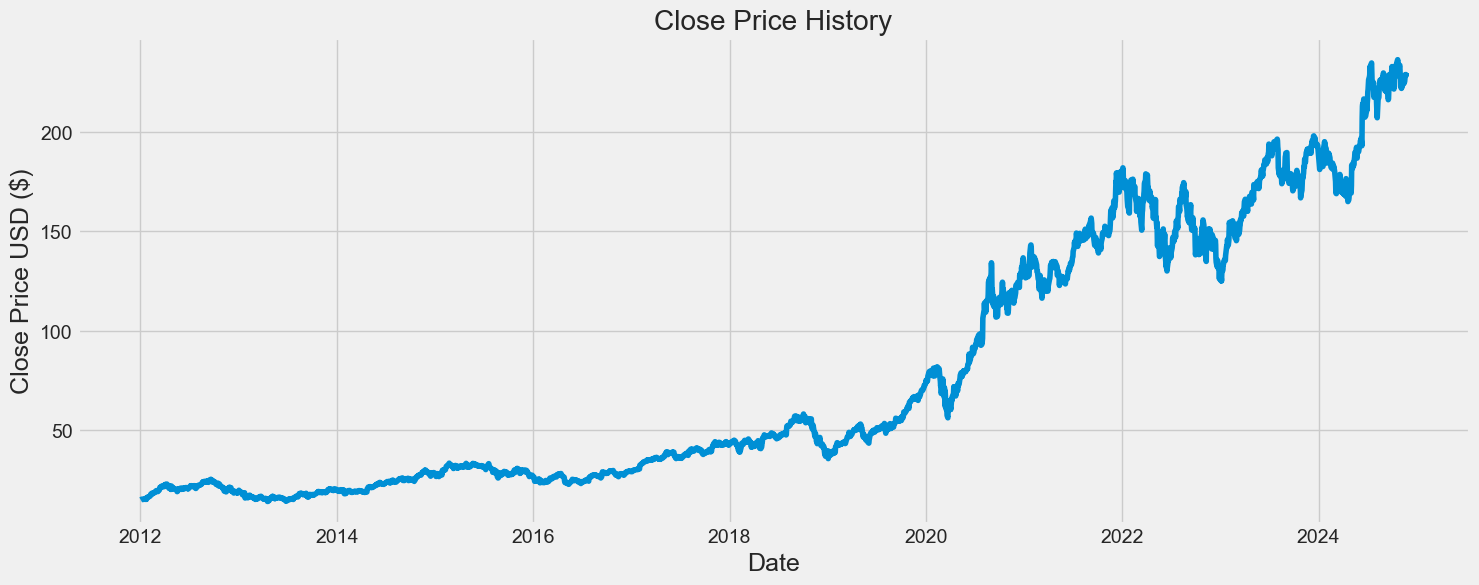

In [42]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [43]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

3083

In [44]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00332215],
       [0.00367683],
       [0.00441348],
       ...,
       [0.96638695],
       [0.96422998],
       [0.97029647]])

In [45]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.00332215, 0.00367683, 0.00441348, 0.00511482, 0.00500729,
       0.00524963, 0.00513889, 0.00495273, 0.00469915, 0.00548395,
       0.00619171, 0.00597344, 0.00477779, 0.00591888, 0.00479545,
       0.00900831, 0.00868252, 0.00910782, 0.01002743, 0.01058432,
       0.01053778, 0.01036606, 0.0110979 , 0.0117864 , 0.01256638,
       0.01382623, 0.01647271, 0.01651284, 0.01798614, 0.0190871 ,
       0.01719492, 0.01792354, 0.0179091 , 0.01995214, 0.01966165,
       0.02019929, 0.02116544, 0.02170309, 0.02325182, 0.02438006,
       0.02470586, 0.02481981, 0.02289072, 0.02242529, 0.02249431,
       0.02430785, 0.02481821, 0.02591436, 0.02849824, 0.03194558,
       0.0313004 , 0.03130201, 0.03379442, 0.03457441, 0.03401911,
       0.03351196, 0.03298395, 0.0347381 , 0.03594178, 0.03644572])]
[0.03520031440172121]

[array([0.00332215, 0.00367683, 0.00441348, 0.00511482, 0.00500729,
       0.00524963, 0.00513889, 0.00495273, 0.00469915, 0.00548395,
       0.00619171, 0.00597344, 0.00

# 6.1 Training LSTM V1.0

Epoch 1/50
95/95 [==============================] - 5s 44ms/step - loss: 0.0062
Epoch 2/50
95/95 [==============================] - 4s 42ms/step - loss: 0.0013
Epoch 3/50
95/95 [==============================] - 4s 42ms/step - loss: 0.0010
Epoch 4/50
95/95 [==============================] - 4s 41ms/step - loss: 8.0348e-04
Epoch 5/50
95/95 [==============================] - 4s 42ms/step - loss: 9.0731e-04
Epoch 6/50
95/95 [==============================] - 4s 41ms/step - loss: 7.9755e-04
Epoch 7/50
95/95 [==============================] - 4s 42ms/step - loss: 6.1923e-04
Epoch 8/50
95/95 [==============================] - 4s 42ms/step - loss: 6.3863e-04
Epoch 9/50
95/95 [==============================] - 4s 42ms/step - loss: 6.7107e-04
Epoch 10/50
95/95 [==============================] - 4s 42ms/step - loss: 6.2496e-04
Epoch 11/50
95/95 [==============================] - 4s 41ms/step - loss: 5.5869e-04
Epoch 12/50
95/95 [==============================] - 4s 42ms/step - loss: 5.9747e-04
E

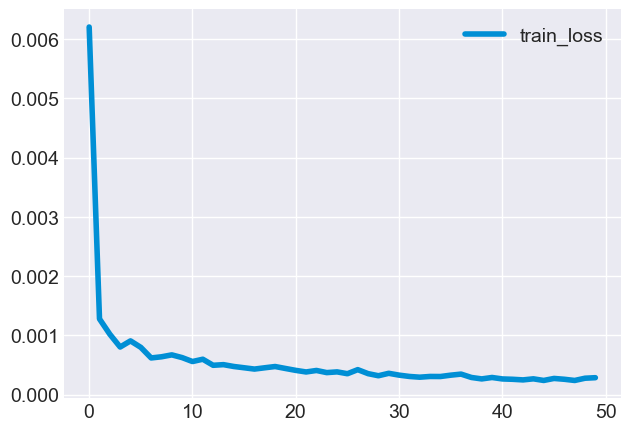

In [101]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
import matplotlib.pyplot as plt
from keras.optimizers import Adam

# Build the LSTM model
model_LSTM = Sequential()
model_LSTM.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model_LSTM.add(Dropout(0.2))
model_LSTM.add(LSTM(64, return_sequences=False))
model_LSTM.add(Dropout(0.2))
model_LSTM.add(Dense(25, activation='relu'))
model_LSTM.add(Dense(1))  # Final output layer

# Compile the model
optimizer = Adam(learning_rate=0.001)
model_LSTM.compile(optimizer=optimizer, loss='mean_squared_error')

# Train the model
history = model_LSTM.fit(x_train, y_train, batch_size=32, epochs=50)

# Plot training vs validation loss
plt.plot(history.history['loss'], label='train_loss')
plt.legend()
plt.show()

# 6.1 Training GRU V1.0

Epoch 1/50
95/95 [==============================] - 5s 35ms/step - loss: 0.0065
Epoch 2/50
95/95 [==============================] - 4s 40ms/step - loss: 0.0011
Epoch 3/50
95/95 [==============================] - 4s 41ms/step - loss: 8.0547e-04
Epoch 4/50
95/95 [==============================] - 4s 39ms/step - loss: 7.6547e-04
Epoch 5/50
95/95 [==============================] - 4s 38ms/step - loss: 6.8403e-04
Epoch 6/50
95/95 [==============================] - 4s 38ms/step - loss: 5.8988e-04
Epoch 7/50
95/95 [==============================] - 4s 38ms/step - loss: 6.3574e-04
Epoch 8/50
95/95 [==============================] - 4s 38ms/step - loss: 5.4110e-04
Epoch 9/50
95/95 [==============================] - 4s 38ms/step - loss: 5.9605e-04
Epoch 10/50
95/95 [==============================] - 4s 37ms/step - loss: 5.0641e-04
Epoch 11/50
95/95 [==============================] - 4s 40ms/step - loss: 5.8407e-04
Epoch 12/50
95/95 [==============================] - 4s 41ms/step - loss: 6.2921e-

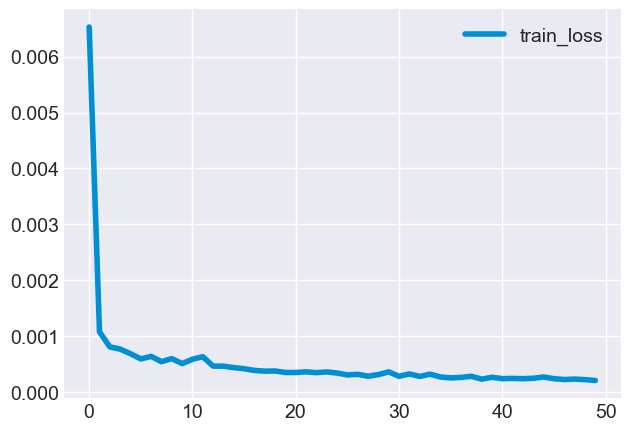

In [102]:
from keras.models import Sequential
from keras.layers import GRU, Dense, Dropout
from keras.optimizers import Adam

model_gru = Sequential()
model_gru.add(GRU(128, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model_gru.add(Dropout(0.2))
model_gru.add(GRU(64, return_sequences=False))
model_gru.add(Dropout(0.2))
model_gru.add(Dense(25, activation='relu'))
model_gru.add(Dense(1))

optimizer = Adam(learning_rate=0.001)
model_gru.compile(optimizer=optimizer, loss='mean_squared_error')

history_gru = model_gru.fit(x_train, y_train, batch_size=32, epochs=50)

plt.plot(history_gru.history['loss'], label='train_loss')
plt.legend()
plt.show()


# 6.2 Training LSTM V2.0

Epoch 1/50
76/76 [==============================] - 5s 53ms/step - loss: 0.0019 - val_loss: 0.0037 - lr: 0.0010
Epoch 2/50
76/76 [==============================] - 4s 48ms/step - loss: 5.5380e-04 - val_loss: 0.0020 - lr: 0.0010
Epoch 3/50
76/76 [==============================] - 4s 47ms/step - loss: 4.2727e-04 - val_loss: 0.0042 - lr: 0.0010
Epoch 4/50
76/76 [==============================] - 4s 47ms/step - loss: 4.0017e-04 - val_loss: 0.0013 - lr: 0.0010
Epoch 5/50
76/76 [==============================] - 4s 51ms/step - loss: 3.5762e-04 - val_loss: 0.0016 - lr: 0.0010
Epoch 6/50
76/76 [==============================] - 4s 53ms/step - loss: 3.5337e-04 - val_loss: 0.0034 - lr: 0.0010
Epoch 7/50
76/76 [==============================] - 4s 50ms/step - loss: 3.2278e-04 - val_loss: 0.0022 - lr: 0.0010
Epoch 8/50
76/76 [==============================] - 4s 52ms/step - loss: 3.2415e-04 - val_loss: 9.5417e-04 - lr: 0.0010
Epoch 9/50
76/76 [==============================] - 4s 51ms/step - loss:

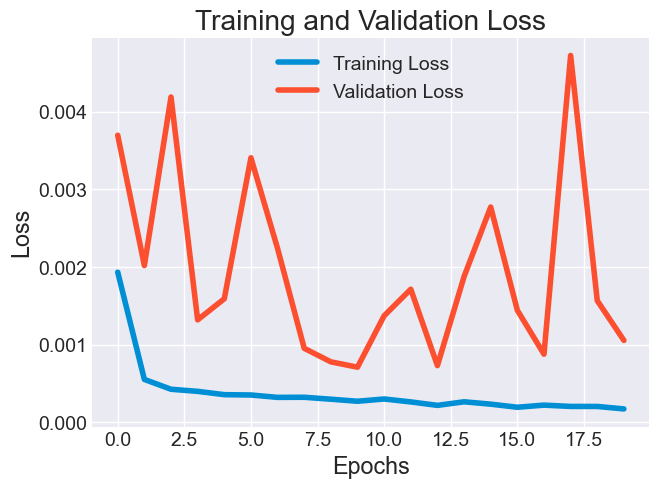

In [103]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt

# Définir le modèle LSTM
model_LSTM_2 = Sequential()
model_LSTM_2.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model_LSTM_2.add(Dropout(0.2))  # Régularisation pour éviter le surapprentissage
model_LSTM_2.add(LSTM(64, return_sequences=False))
model_LSTM_2.add(Dropout(0.2))
model_LSTM_2.add(Dense(25, activation='relu'))  # Couche entièrement connectée avec activation ReLU
model_LSTM_2.add(Dense(1))  # Couche de sortie pour la régression

# Compilation du modèle
optimizer = Adam(learning_rate=0.001)
model_LSTM_2.compile(optimizer=optimizer, loss='mean_squared_error')

# Callbacks pour optimiser l'entraînement
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

# Entraîner le modèle
history = model_LSTM_2.fit(
    x_train, y_train,
    validation_split=0.2,
    batch_size=32,
    epochs=50,
    callbacks=[early_stopping, reduce_lr]
)

# Tracer les pertes d'entraînement et de validation
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


# 6.2 Training GRU V2.0

Epoch 1/100
76/76 [==============================] - 7s 57ms/step - loss: 0.0025 - val_loss: 4.5903e-04 - lr: 0.0010
Epoch 2/100
76/76 [==============================] - 4s 59ms/step - loss: 0.0011 - val_loss: 0.0111 - lr: 0.0010
Epoch 3/100
76/76 [==============================] - 4s 57ms/step - loss: 0.0010 - val_loss: 0.0010 - lr: 0.0010
Epoch 4/100
76/76 [==============================] - 5s 60ms/step - loss: 9.5152e-04 - val_loss: 7.2637e-04 - lr: 0.0010
Epoch 5/100
76/76 [==============================] - 4s 58ms/step - loss: 7.8833e-04 - val_loss: 2.4385e-04 - lr: 0.0010
Epoch 6/100
76/76 [==============================] - 4s 54ms/step - loss: 6.4673e-04 - val_loss: 5.3422e-04 - lr: 0.0010
Epoch 7/100
76/76 [==============================] - 4s 56ms/step - loss: 6.5996e-04 - val_loss: 0.0109 - lr: 0.0010
Epoch 8/100
76/76 [==============================] - 4s 51ms/step - loss: 6.1252e-04 - val_loss: 0.0067 - lr: 0.0010
Epoch 9/100
76/76 [==============================] - 4s 54ms

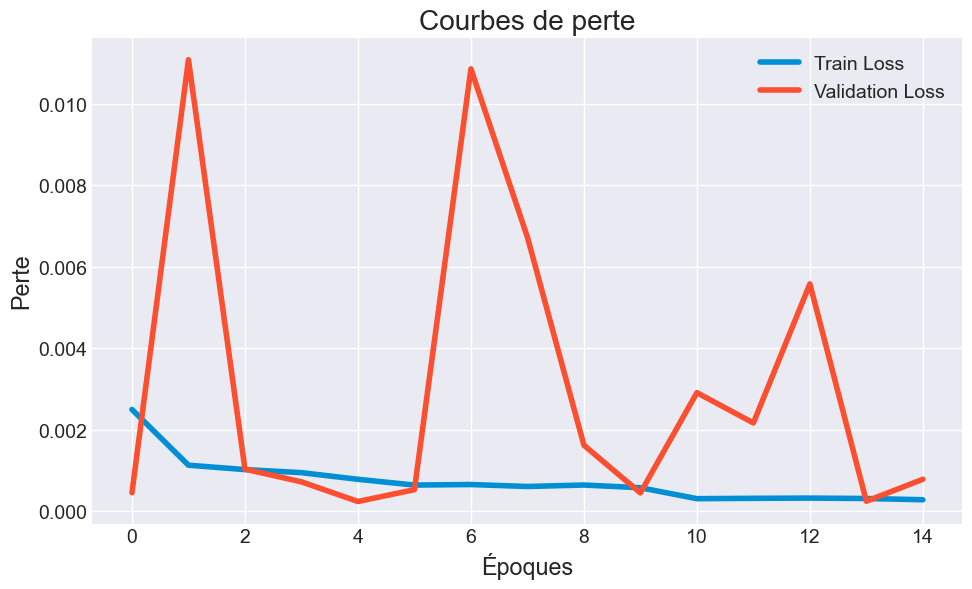

Perte finale sur l'ensemble d'entraînement : 0.0014


In [104]:
import numpy as np
from keras.models import Sequential
from keras.layers import GRU, Dense, Dropout, Bidirectional
from keras.optimizers import RMSprop
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Modèle GRU amélioré
model_gru_2 = Sequential()
model_gru_2.add(Bidirectional(GRU(128, return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2]))))
model_gru_2.add(Dropout(0.2))
model_gru_2.add(GRU(64, return_sequences=False))
model_gru_2.add(Dropout(0.3))
model_gru_2.add(Dense(50, activation='relu'))  # Regularisation possible avec kernel_regularizer=l2(0.01)
model_gru_2.add(Dense(1))  # Sortie

# Compilation du modèle
optimizer = RMSprop(learning_rate=0.001)
model_gru_2.compile(optimizer=optimizer, loss='mean_squared_error')

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

# Entraînement
history_gru = model_gru_2.fit(x_train, y_train, 
                            validation_split=0.2, 
                            batch_size=32, 
                            epochs=100, 
                            callbacks=[early_stopping, reduce_lr],
                            verbose=1)

# Visualisation des pertes
plt.figure(figsize=(10, 6))
plt.plot(history_gru.history['loss'], label='Train Loss')
plt.plot(history_gru.history['val_loss'], label='Validation Loss')
plt.title("Courbes de perte")
plt.xlabel("Époques")
plt.ylabel("Perte")
plt.legend()
plt.grid(True)
plt.show()

# Évaluation finale
loss = model_gru.evaluate(x_train, y_train, verbose=0)
print(f"Perte finale sur l'ensemble d'entraînement : {loss:.4f}")


# RNN

Epoch 1/100
152/152 [==============================] - 3s 12ms/step - loss: 0.0105 - val_loss: 0.0063 - lr: 0.0010
Epoch 2/100
152/152 [==============================] - 2s 11ms/step - loss: 0.0017 - val_loss: 0.0144 - lr: 0.0010
Epoch 3/100
152/152 [==============================] - 2s 12ms/step - loss: 0.0013 - val_loss: 0.0072 - lr: 0.0010
Epoch 4/100
152/152 [==============================] - 2s 11ms/step - loss: 7.5233e-04 - val_loss: 0.0098 - lr: 0.0010
Epoch 5/100
152/152 [==============================] - 2s 11ms/step - loss: 7.5785e-04 - val_loss: 0.0063 - lr: 0.0010
Epoch 6/100
152/152 [==============================] - 2s 11ms/step - loss: 6.2260e-04 - val_loss: 0.0092 - lr: 0.0010
Epoch 7/100
152/152 [==============================] - 2s 12ms/step - loss: 5.8597e-04 - val_loss: 0.0063 - lr: 5.0000e-04
Epoch 8/100
152/152 [==============================] - 2s 13ms/step - loss: 5.4980e-04 - val_loss: 0.0037 - lr: 5.0000e-04
Epoch 9/100
152/152 [==============================]

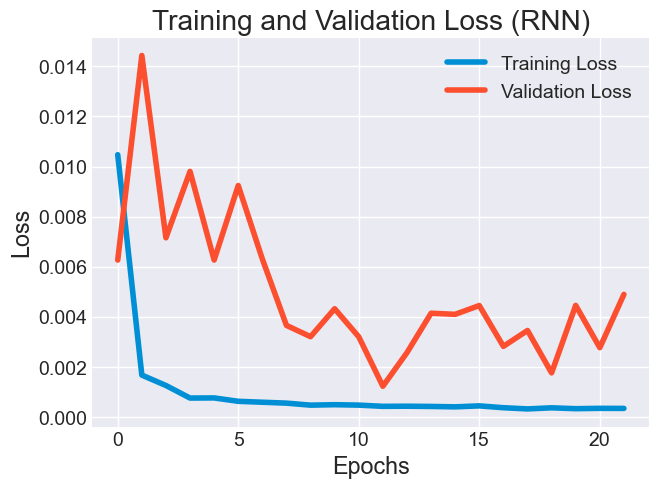

In [105]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense, Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt

# Définir le modèle RNN
model_rnn = Sequential()
model_rnn.add(SimpleRNN(128, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model_rnn.add(Dropout(0.2))  # Régularisation pour éviter le surapprentissage
model_rnn.add(SimpleRNN(64, return_sequences=False))
model_rnn.add(Dropout(0.2))
model_rnn.add(Dense(25, activation='relu'))  # Couche entièrement connectée avec activation ReLU
model_rnn.add(Dense(1))  # Couche de sortie pour la régression

# Compilation du modèle
optimizer = Adam(learning_rate=0.001)
model_rnn.compile(optimizer=optimizer, loss='mean_squared_error')

# Callbacks pour optimiser l'entraînement
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

# Entraîner le modèle
history = model_rnn.fit(
    x_train, y_train,
    validation_split=0.2,
    batch_size=16,
    epochs=100,
    callbacks=[early_stopping, reduce_lr]
)

# Tracer les pertes d'entraînement et de validation
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss (RNN)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


# 7. Prediction

In [106]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

### Get the models predicted price values 
#GRU
predictions_gru = model_gru.predict(x_test)
predictions_gru = scaler.inverse_transform(predictions_gru)
#LSTM
predictions_lstm = model_LSTM.predict(x_test)
predictions_lstm = scaler.inverse_transform(predictions_lstm)
#LSTM_2
predictions_lstm_2 = model_LSTM_2.predict(x_test)
predictions_lstm_2 = scaler.inverse_transform(predictions_lstm_2)
#GRU_2
predictions_gru_2 = model_gru_2.predict(x_test)
predictions_gru_2 = scaler.inverse_transform(predictions_gru_2)
#RNN
predictions_rnn = model_rnn.predict(x_test)
predictions_rnn = scaler.inverse_transform(predictions_rnn)

### Get the root mean squared error (RMSE)
#GRU
rmse_gru = np.sqrt(np.mean(((predictions_gru - y_test) ** 2)))
print(f"rmse GRU: {rmse_gru:.2f}")
#GRU_2
rmse_gru_2 = np.sqrt(np.mean(((predictions_gru_2 - y_test) ** 2)))
print(f"rmse GRU_2: {rmse_gru_2:.2f}")
#LSTM
rmse_lstm = np.sqrt(np.mean(((predictions_lstm - y_test) ** 2)))
print(f"rmse LSTM: {rmse_lstm:.2f}")
#LSTM_2
rmse_lstm_2 = np.sqrt(np.mean(((predictions_lstm_2 - y_test) ** 2)))
print(f"rmse LSTM_2: {rmse_lstm_2:.2f}")
#RNN
rmse_rnn = np.sqrt(np.mean(((predictions_rnn - y_test) ** 2)))
print(f"rmse RNN : {rmse_rnn:.2f}")



6/6 [==============================] - 0s 4ms/step
rmse GRU: 22.33
rmse GRU_2: 3.76
rmse LSTM: 25.27
rmse LSTM_2: 6.37
rmse RNN : 27.25


In [107]:
# Show the valid and predicted prices
valid['Predictions_rnn'] = predictions_rnn
valid[['Close','Predictions_GRU','Predictions_LSTM','Predictions_GRU_2','Predictions_LSTM_2','Predictions_rnn']].head()

/var/folders/jn/9ky4bnns2n72gwm_jg0ksgk80000gn/T/ipykernel_88939/2149396202.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions_rnn'] = predictions_rnn


,Close,Predictions_GRU,Predictions_LSTM,Predictions_GRU_2,Predictions_LSTM_2,Predictions_rnn
Date,,,,,,
2024-04-05,169.580002,167.020386,171.004944,168.465576,169.271774,167.556763
2024-04-08,168.449997,167.323029,170.965225,168.360580,168.823563,166.696060
2024-04-09,169.669998,166.607986,170.719376,167.994736,168.400650,166.846466
2024-04-10,167.779999,167.276596,170.861801,168.073441,168.131866,167.753387
2024-04-11,175.039993,166.116623,170.493698,167.623367,167.841766,167.099442


/var/folders/jn/9ky4bnns2n72gwm_jg0ksgk80000gn/T/ipykernel_88939/504201287.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions_GRU'] = predictions_gru
/var/folders/jn/9ky4bnns2n72gwm_jg0ksgk80000gn/T/ipykernel_88939/504201287.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions_LSTM'] = predictions_lstm
/var/folders/jn/9ky4bnns2n72gwm_jg0ksgk80000gn/T/ipykernel_88939/504201287.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

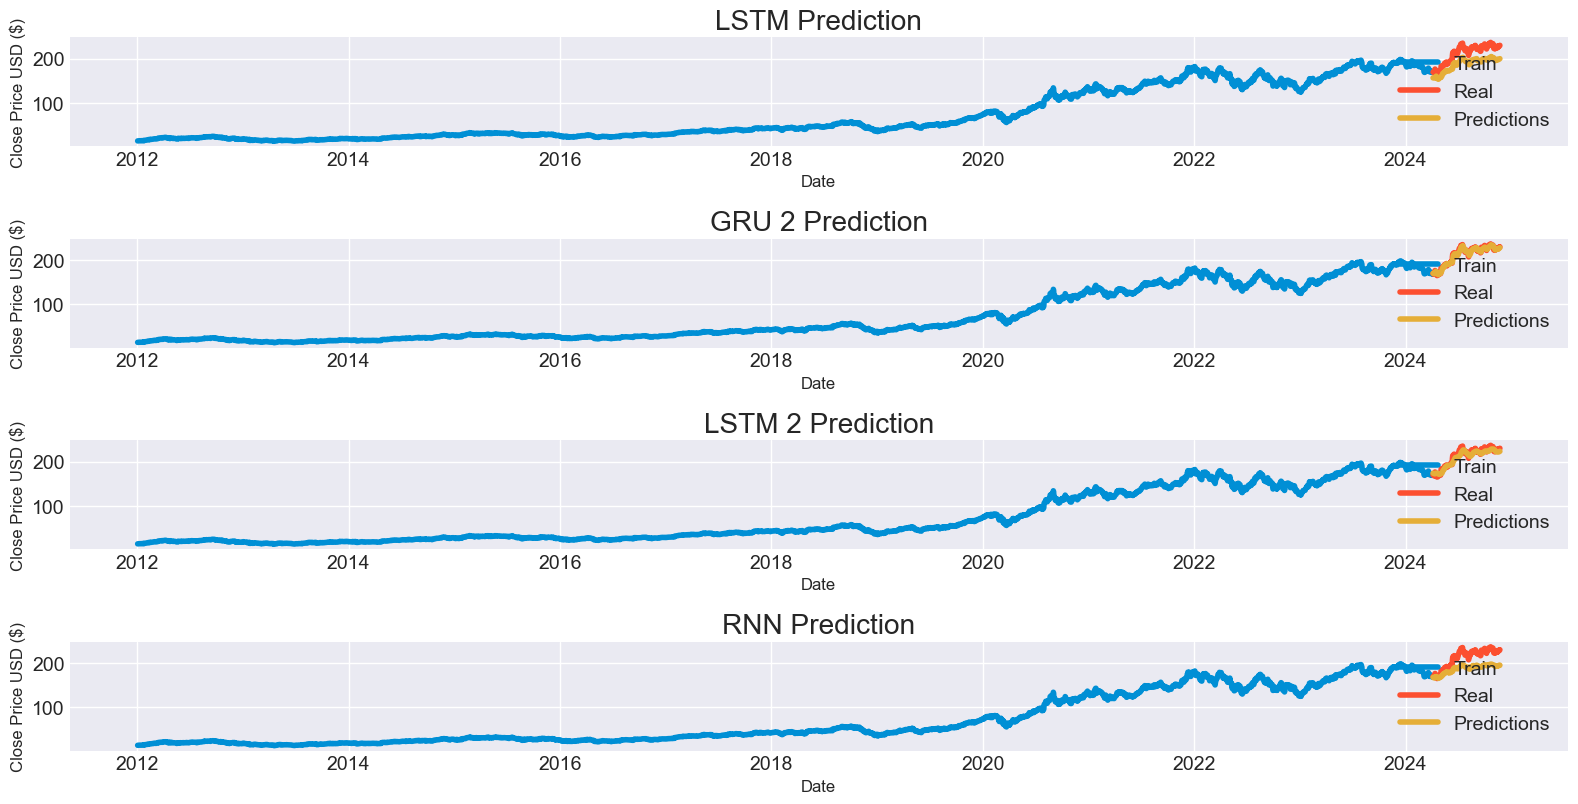

In [108]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]

# Add the predictions to the valid data
valid['Predictions_GRU'] = predictions_gru
valid['Predictions_LSTM'] = predictions_lstm
valid['Predictions_GRU_2'] = predictions_gru_2  # Assuming you have this
valid['Predictions_LSTM_2'] = predictions_lstm_2  # Assuming you have this

# Create a figure with 2 rows and 2 columns
plt.figure(figsize=(16, 10))

# First subplot for GRU predictions
plt.subplot(4, 1, 1)  # Row 1
plt.title('GRU Prediction')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Close Price USD ($)', fontsize=12)
plt.plot(train['Close'], label='Train')
plt.plot(valid[['Close', 'Predictions_GRU']])
plt.legend(['Train', 'Real', 'Predictions'], loc='lower right')

# Second subplot for LSTM predictions
plt.subplot(5, 1, 2)  # Row 2
plt.title('LSTM Prediction')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Close Price USD ($)', fontsize=12)
plt.plot(train['Close'], label='Train')
plt.plot(valid[['Close', 'Predictions_LSTM']])
plt.legend(['Train', 'Real', 'Predictions'], loc='lower right')

# Third subplot for GRU 2 predictions
plt.subplot(5, 1, 3)  # Row 3
plt.title('GRU 2 Prediction')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Close Price USD ($)', fontsize=12)
plt.plot(train['Close'], label='Train')
plt.plot(valid[['Close', 'Predictions_GRU_2']])
plt.legend(['Train', 'Real', 'Predictions'], loc='lower right')

# Fourth subplot for LSTM 2 predictions
plt.subplot(5, 1, 4)  # Row 4
plt.title('LSTM 2 Prediction')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Close Price USD ($)', fontsize=12)
plt.plot(train['Close'], label='Train')
plt.plot(valid[['Close', 'Predictions_LSTM_2']])
plt.legend(['Train', 'Real', 'Predictions'], loc='lower right')

# Fourth subplot for LSTM 2 predictions
plt.subplot(5, 1, 5)  # Row 4
valid['Predictions_rnn'] = predictions_rnn
plt.title('RNN Prediction')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Close Price USD ($)', fontsize=12)
plt.plot(train['Close'], label='Train')
plt.plot(valid[['Close', 'Predictions_rnn']])
plt.legend(['Train', 'Real', 'Predictions'], loc='lower right')

# Show the plots
plt.tight_layout()  # Ensures proper spacing between the plots
plt.show()


/var/folders/jn/9ky4bnns2n72gwm_jg0ksgk80000gn/T/ipykernel_88939/1440946910.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions_GRU'] = predictions_gru
/var/folders/jn/9ky4bnns2n72gwm_jg0ksgk80000gn/T/ipykernel_88939/1440946910.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions_LSTM'] = predictions_lstm


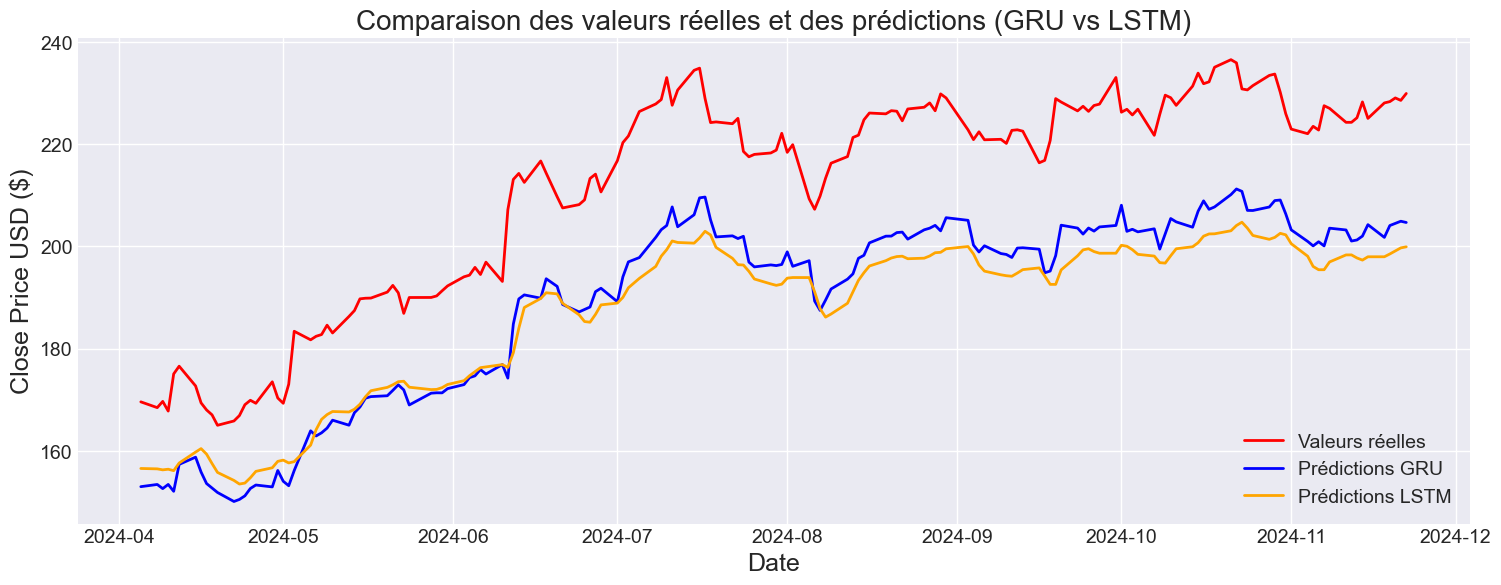

In [119]:
# Ajouter les prédictions des deux modèles (GRU et LSTM) dans le DataFrame 'valid'
valid['Predictions_GRU'] = predictions_gru
valid['Predictions_LSTM'] = predictions_lstm

# Tracer le graphique
plt.figure(figsize=(16, 6))
plt.title('Comparaison des valeurs réelles et des prédictions (GRU vs LSTM)', fontsize=20)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)

# Afficher les données réelles
plt.plot(valid['Close'], label='Valeurs réelles', linewidth=2, color='red')

# Afficher les prédictions des deux modèles avec des couleurs différentes
plt.plot(valid['Predictions_GRU'], label='Prédictions GRU', linewidth=2, color='blue')
plt.plot(valid['Predictions_LSTM'], label='Prédictions LSTM', linewidth=2, color='orange')

# Ajouter une légende
plt.legend(['Valeurs réelles', 'Prédictions GRU', 'Prédictions LSTM'], loc='lower right')

# Afficher le graphique
plt.show()


/var/folders/jn/9ky4bnns2n72gwm_jg0ksgk80000gn/T/ipykernel_88939/231557559.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions_GRU_2'] = predictions_gru_2
/var/folders/jn/9ky4bnns2n72gwm_jg0ksgk80000gn/T/ipykernel_88939/231557559.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions_LSTM_2'] = predictions_lstm_2


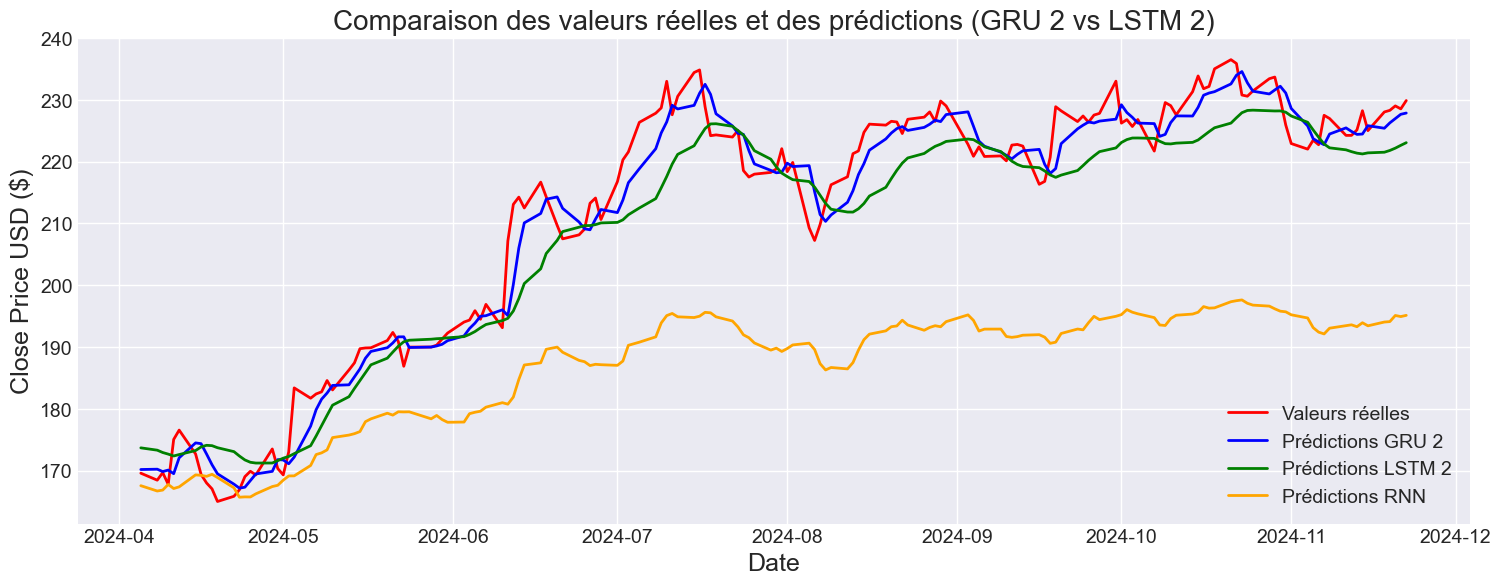

In [117]:
# Ajouter les prédictions des deux modèles (GRU et LSTM) dans le DataFrame 'valid'
valid['Predictions_GRU_2'] = predictions_gru_2
valid['Predictions_LSTM_2'] = predictions_lstm_2

# Tracer le graphique
plt.figure(figsize=(16, 6))
plt.title('Comparaison des valeurs réelles et des prédictions (GRU 2 vs LSTM 2)', fontsize=20)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)

# Afficher les données réelles
plt.plot(valid['Close'], label='Valeurs réelles', linewidth=2, color='red')

# Afficher les prédictions des deux modèles avec des couleurs différentes
plt.plot(valid['Predictions_GRU_2'], label='Prédictions GRU 2', linewidth=2, color='blue')
plt.plot(valid['Predictions_LSTM_2'], label='Prédictions LSTM 2', linewidth=2, color='green')
plt.plot(valid['Predictions_rnn'], label='Prédictions RNN', linewidth=2, color='orange')

# Ajouter une légende
plt.legend(['Valeurs réelles', 'Prédictions GRU 2', 'Prédictions LSTM 2', 'Prédictions RNN'], loc='lower right')

# Afficher le graphique
plt.show()


/var/folders/jn/9ky4bnns2n72gwm_jg0ksgk80000gn/T/ipykernel_88939/1245268807.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions_GRU_2'] = predictions_gru_2
/var/folders/jn/9ky4bnns2n72gwm_jg0ksgk80000gn/T/ipykernel_88939/1245268807.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions_LSTM_2'] = predictions_lstm_2
/var/folders/jn/9ky4bnns2n72gwm_jg0ksgk80000gn/T/ipykernel_88939/1245268807.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

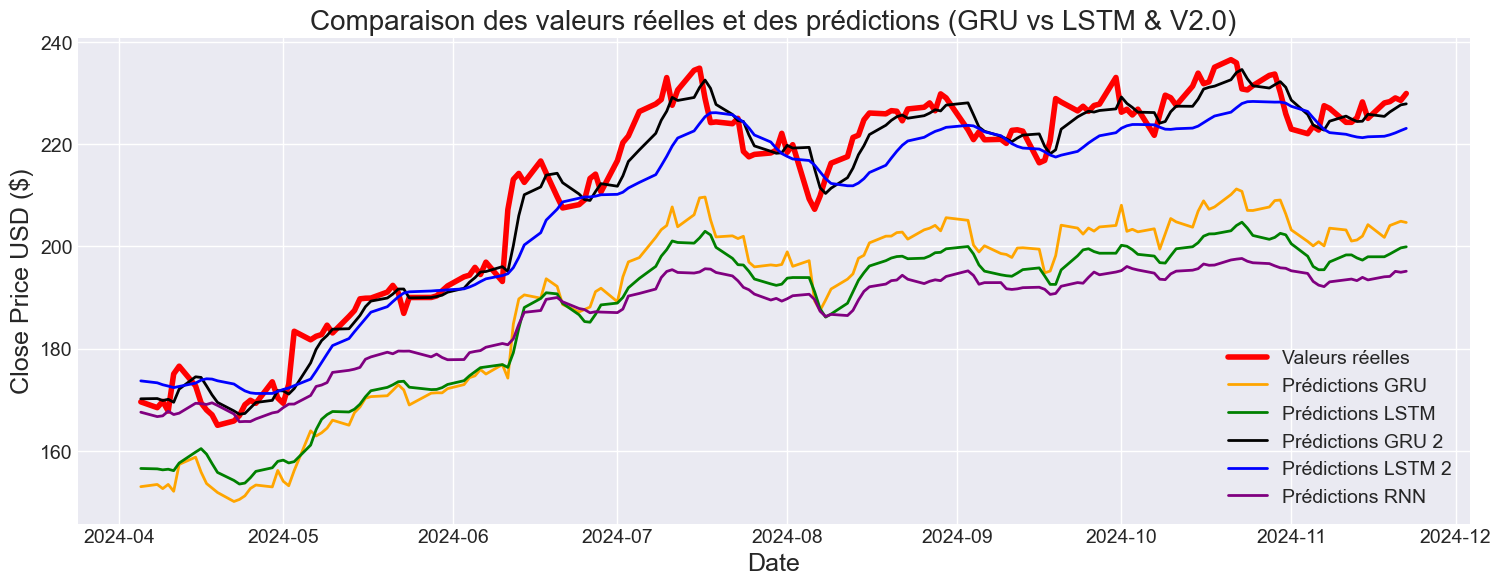

In [116]:
# Ajouter les prédictions des deux modèles (GRU et LSTM) dans le DataFrame 'valid'
valid['Predictions_GRU_2'] = predictions_gru_2
valid['Predictions_LSTM_2'] = predictions_lstm_2
valid['Predictions_GRU'] = predictions_gru
valid['Predictions_LSTM'] = predictions_lstm

# Tracer le graphique
plt.figure(figsize=(16, 6))
plt.title('Comparaison des valeurs réelles et des prédictions (GRU vs LSTM & V2.0)', fontsize=20)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)

# Afficher les données réelles
plt.plot(valid['Close'], label='Valeurs réelles', color='red')

# Afficher les prédictions des deux modèles avec des couleurs différentes
plt.plot(valid['Predictions_GRU'], label='Prédictions GRU', linewidth=2, color='orange')
plt.plot(valid['Predictions_LSTM'], label='Prédictions LSTM', linewidth=2, color='green')
plt.plot(valid['Predictions_GRU_2'], label='Prédictions GRU 2', linewidth=2, color='black')
plt.plot(valid['Predictions_LSTM_2'], label='Prédictions LSTM 2', linewidth=2, color='blue')
plt.plot(valid['Predictions_rnn'], label='Prédictions RNN', linewidth=2, color='purple')

# Ajouter une légende
plt.legend(['Valeurs réelles', 'Prédictions GRU', 'Prédictions LSTM', 'Prédictions GRU 2', 'Prédictions LSTM 2', 'Prédictions RNN'], loc='lower right')

# Afficher le graphique
plt.show
# Afficher le graphique
plt.show()


# Summary
In this notebook, you discovered and explored stock data.

Specifically, you learned:

- How to load stock market data from the YAHOO Finance website using yfinance.
- How to explore and visualize time-series data using Pandas, Matplotlib, and Seaborn.
- How to measure the correlation between stocks.
- How to measure the risk of investing in a particular stock.

Do you have any questions?
Ask your questions in the comments below and I will do my best to answer.

References:
https://www.investopedia.com/terms/c/correlation.asp
[Jose Portilla Udemy Course: Learning Python for Data Analysis and Visualization](https://www.udemy.com/course/learning-python-for-data-analysis-and-visualization/)